<a href="https://colab.research.google.com/github/rajlm10/Shoppster/blob/main/MLD_Project_ViT_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Nov 25 08:16:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    42W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install -Uq sentence_transformers
!pip install transformers

     |████████████████████████████████| 85 kB 5.1 MB/s 
     |████████████████████████████████| 5.5 MB 68.3 MB/s 
     |████████████████████████████████| 1.3 MB 67.9 MB/s 
     |████████████████████████████████| 182 kB 69.5 MB/s 
     |████████████████████████████████| 7.6 MB 54.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir ~/.kaggle/
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
tqdm.pandas()

In [6]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!unzip -qq /content/fashion-product-images-small.zip 

100% 565M/565M [00:38<00:00, 17.8MB/s]
100% 565M/565M [00:38<00:00, 15.5MB/s]


In [3]:
datapath = '/content/'
csv_path = datapath + 'triplet_data.csv'

In [4]:
df = pd.read_csv(csv_path)
df['anchor'] = df['anchor'].astype('str')
df['anchor'] = df['anchor'] + '.jpg'
df = df.rename({'anchor': 'image_id'}, axis='columns')
print(len(df.index))
values = ['10000.jpg','10000.jpg','39410.jpg','39425.jpg','39403.jpg','39401.jpg']
df = df[df.image_id.isin(values) == False]
print(len(df.index))
df = df.reset_index(drop=True)


294972
294933


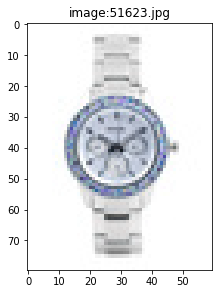

In [5]:
import matplotlib.pyplot as plt
import cv2
import os
#Plot the image
fig = plt.figure(figsize=(15, 10))
rows = 2
columns = 3
select = ['51623.jpg'] 
for idx, name in enumerate(select):
  image_path = '/content/myntradataset/images/'
  image_name = image_path + name
  image = cv2.imread(image_name)
  fig.add_subplot(rows, columns, idx+1)
  plt.imshow(image)
  plt.title(('image:' + str(name)))

plt.show()

#Splitting the Data

In [6]:
def split(dataframe,train_split=0.8,valid_split=0.1):
  total_length = len(dataframe)

  ids = np.random.permutation(sorted(list(set(dataframe['image_id'])))).tolist()
  unique_images = len(ids)
  train_ids = ids[:int(train_split*unique_images)]
  val_ids = ids[len(train_ids):len(train_ids)+1+int(valid_split*unique_images)]
  test_ids = ids[len(train_ids)+len(val_ids):]


  train_dataframe = pd.DataFrame()
  val_dataframe = pd.DataFrame()
  test_dataframe = pd.DataFrame()


  train_dataframe = train_dataframe.append(df[df.image_id.isin(train_ids)])
  val_dataframe = val_dataframe.append(df[df.image_id.isin(val_ids)])
  test_dataframe = test_dataframe.append(df[df.image_id.isin(test_ids)])

  
  return train_dataframe.reset_index(drop=True),val_dataframe.reset_index(drop=True),test_dataframe.reset_index(drop=True)


train_dataframe,val_dataframe,test_dataframe = split(df)


In [ ]:
(len(train_dataframe)+len(val_dataframe)+len(test_dataframe))==len(df)

In [12]:
set(train_dataframe['image_id']).intersection(set(val_dataframe['image_id'])).intersection(test_dataframe['image_id'])

set()

In [9]:
#check if all file exist in images
for id in set(df['image_id']):
  if os.path.exists('/content/myntradataset/images/'+id) == False:
    print(id)

#Show Triplets

In [10]:
train_dataframe

,image_id,positive,negative,level
0,15970.jpg,Men Casual Navy Blue Shirt,Women Casual Clematis Perfume,easy
1,15970.jpg,Men Casual Navy Blue Shirt,Women Casual Valley Hoor Green Wallet,easy
2,15970.jpg,Men Casual Navy Blue Shirt,Men Casual Yellow Flip Flops,easy
3,15970.jpg,Men Casual Navy Blue Shirt,Women Casual Yellow Printed Top,semi
4,15970.jpg,Men Casual Navy Blue Shirt,Women Casual Light Winter Purple Tops,semi
...,...,...,...,...
235908,51623.jpg,Women Casual Pink Dial Chronograph Watch ES3050,Men Casual Sliver Dial Chronograph Watch,semi
235909,51623.jpg,Women Casual Pink Dial Chronograph Watch ES3050,Men Casual Silver Dial Watch,semi
235910,51623.jpg,Women Casual Pink Dial Chronograph Watch ES3050,Men Casual White Dial Watch,semi
235911,51623.jpg,Women Casual Pink Dial Chronograph Watch ES3050,Women Casual Pink Dial Watch,hard


Men Casual Navy Blue Shirt


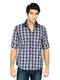


Negative 1: Women Casual Clematis Perfume
Negative 2: Women Casual Valley Hoor Green Wallet
Negative 3: Men Casual Yellow Flip Flops
Negative 4: Women Casual Yellow Printed Top
Negative 5: Women Casual Light Winter Purple Tops
Negative 6: Women Casual Peach Top
Negative 7: Women Casual Printed Magenta Top
Negative 8: Men Casual Wander Wheels Navy Blue Shirts
Negative 9: Men Casual Solid Navy Blue Shirt
Negative 10: Men Casual Navy Blue Check Shirt


<Figure size 720x1080 with 0 Axes>

In [11]:
from google.colab.patches import cv2_imshow
def plot_triplets(dataframe,id):
  plt.figure(figsize=(10,15))
  anchor = cv2.imread(f'/content/images/{id}')
  print(dataframe[dataframe.image_id==id]['positive'].iloc[0])
  cv2_imshow(anchor);
  print()
  for idx,item in dataframe[dataframe.image_id==id].iterrows():
    print(f'Negative {idx+1}: {item.negative}')

plot_triplets(train_dataframe,'15970.jpg')

In [12]:
train_dataframe.info(),val_dataframe.info(),test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235913 entries, 0 to 235912
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  235913 non-null  object
 1   positive  235913 non-null  object
 2   negative  235913 non-null  object
 3   level     235913 non-null  object
dtypes: object(4)
memory usage: 7.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29466 entries, 0 to 29465
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  29466 non-null  object
 1   positive  29466 non-null  object
 2   negative  29466 non-null  object
 3   level     29466 non-null  object
dtypes: object(4)
memory usage: 920.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29554 entries, 0 to 29553
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  29554 non-null  object
 1   positive  2

(None, None, None)

In [13]:
train_dataframe=train_dataframe.dropna()
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235913 entries, 0 to 235912
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  235913 non-null  object
 1   positive  235913 non-null  object
 2   negative  235913 non-null  object
 3   level     235913 non-null  object
dtypes: object(4)
memory usage: 9.0+ MB


#Image Encoder

In [7]:
import torch
from torch import nn
from transformers import AutoFeatureExtractor, AutoModel
from torchvision import transforms


class ImageEncoder(nn.Module):
    def __init__(self, model_name="google/vit-base-patch16-224-in21k", pretrained=True, trainable=True, device=None):
        super().__init__()
        self.device = device
        self.model = AutoModel.from_pretrained(model_name)

        self.model.to(self.device)
        
        if trainable:
          for p in self.model.parameters():
              p.requires_grad = trainable

    def forward(self, image_inputs):
        image_inputs = {k:v.to(self.device) for k,v in image_inputs.items()}
        image_outputs = self.model(**image_inputs)
        image_embedding = image_outputs.pooler_output # I am using pooled CLS, 
        return image_embedding

#Text Encoder

In [8]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

class TextEncoder(nn.Module):

    def __init__(self, model_name="sentence-transformers/all-mpnet-base-v2", trainable=True, device=None):
        super().__init__()
        self.device=device
        word_embedding_model = models.Transformer(model_name)
        pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), 'mean')
        self.model = SentenceTransformer(modules=[word_embedding_model, pooling_model], device=device)
        self.model.to(self.device)

        if trainable:    
          for p in self.model.parameters():
              p.requires_grad = trainable

    def forward(self, text):
        attr_embedding = self.model.encode(text, convert_to_tensor=True, device=self.device)
        return attr_embedding

#Creating PyTorch Dataset

In [9]:
from PIL import Image
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
import torch


class FashionDataset(Dataset):

    def __init__(self, root_dir, df):
        self.df = df
        self.root_dir = root_dir
        self.processor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")    
        

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image_file = self.root_dir + "/" + self.df["image_id"][idx]
        positive = self.df['positive'][idx] 
        negative = self.df['negative'][idx] 
        image = Image.open(image_file).convert("RGB")

        encoding={}
        encoding["image_name"] = self.df["image_id"][idx]

        pixel_vals = self.processor(image, return_tensors="pt").pixel_values #The preprocessor will take care of resizing.
        encoding["anchor"] = {"pixel_values" : pixel_vals.squeeze(0)}

        encoding["pos"] = positive
        encoding["neg"] = negative
        

        return encoding

In [10]:
train_dataframe = pd.read_csv('/content/drive/MyDrive/TechSquad/train_data.csv') 
val_dataframe = pd.read_csv('/content/drive/MyDrive/TechSquad/val_data.csv')
test_dataframe = pd.read_csv('/content/drive/MyDrive/TechSquad/test_data.csv') 

In [13]:
train_dataset = FashionDataset(
                           root_dir='./images',
                           df=train_dataframe
                            )

dev_dataset = FashionDataset(
                           root_dir='./images',
                           df=val_dataframe
                            )

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 256
val_batch_size = 256
dataloader_train = DataLoader(train_dataset,
                              sampler=SequentialSampler(train_dataset), 
                              batch_size=batch_size)
dataloader_validation = DataLoader(dev_dataset, 
                                   sampler=SequentialSampler(dev_dataset), 
                                   batch_size=val_batch_size)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
for batch in dataloader_train:
  print(batch['anchor']['pixel_values'].shape)
  break


torch.Size([256, 3, 224, 224])


#Entire Model

In [15]:
import math
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self, hyperparms=None):

        super(Network, self).__init__()  
        self.vision_projection = nn.Linear(hyperparms["vision_dim"], hyperparms["proj_dim"])
        self.text_projection = nn.Linear(hyperparms["text_dim"], hyperparms["proj_dim"])     
        self.dropout = nn.Dropout(0.1)

        device = hyperparms["device"]
        model_name = hyperparms["model_name"]
        self.image_encoder = ImageEncoder(model_name, device=device)


        self.text_encoder = TextEncoder(device=device)
        EUCLIDEAN = lambda x, y: F.pairwise_distance(x, y, p=2)
        self.criterion = nn.TripletMarginWithDistanceLoss(margin=0.2, distance_function=EUCLIDEAN, reduction="mean")
        self.relu_f = nn.ReLU()

    def forward(self, batch):

        # Getting Image and Text Features
        image_emb = self.image_encoder(batch["anchor"])
        image_emb = torch.nn.functional.normalize(image_emb, p=2, dim=1)
        
        # Getting Image and Text Embeddings (with same dimension)
        image_emb = self.relu_f(self.vision_projection(image_emb))
        image_emb = self.dropout(image_emb)

        pos_emb = self.text_encoder(batch["pos"])
        pos_emb = torch.nn.functional.normalize(pos_emb, p=2, dim=1)
        pos_emb = self.relu_f(self.text_projection(pos_emb))
        pos_emb = self.dropout(pos_emb)

        neg_emb = self.text_encoder(batch["neg"])
        neg_emb = torch.nn.functional.normalize(neg_emb, p=2, dim=1)
        neg_emb = self.relu_f(self.text_projection(neg_emb))
        neg_emb = self.dropout(neg_emb)

        # Calculating the Loss
        loss = self.criterion(image_emb, pos_emb, neg_emb)       #Triplet Loss calculation
        return loss


#Training Loop

In [16]:
import random
from torch import nn
from tqdm.notebook import tqdm
import numpy as np
import requests


def evaluate(dataloader_val):

    model.eval()
    loss_val_total = 0
    
    for batch in dataloader_val:
        with torch.no_grad():        
            loss = model(batch)
            
        loss_val_total += loss.item()
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    return loss_val_avg

def train():

  train_history = open("./models/train_history.csv", "w")
  log_hdr  = "Epoch, train_loss, val_loss"
  train_history.write(log_hdr  + "\n")
  train_losses = []
  val_losses = []
  min_val_loss = -1
  epochs_no_improve = 0
  early_stopping_epoch = 1
  early_stop = False
  best_loss = float('inf')


  for epoch in tqdm(range(1, epochs+1)):

      model.train()
      loss_train_total = 0

      progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

      for batch in progress_bar:
          model.zero_grad()

          loss = model(batch)
          loss_train_total += loss.item()
          loss.backward()
          optimizer.step()
          scheduler.step()

          progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(dataloader_train)            
      tqdm.write(f'Training loss: {loss_train_avg}')
      val_loss = evaluate(dataloader_validation)
      tqdm.write(f'Validation loss: {val_loss}')

      if val_loss < best_loss:
          best_loss = val_loss
          tqdm.write('\nSaving best model')
          torch.save(model.state_dict(), f'./models/network_epoch_{epoch}.model')          

      train_losses.append(loss_train_avg)
      val_losses.append(val_loss)
      log_str  = "{}, {}, {}".format(epoch, loss_train_avg, val_loss)
      train_history.write(log_str + "\n")

      if min_val_loss < 0:
          min_val_loss = val_loss
      else:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stopping_epoch:
                early_stop = True
                break
            else:
                continue    


  if early_stop:
    print("Early Stopping activated at epoch -", epoch )
    print("Use the checkpoint at epoch - ", epoch - early_stopping_epoch)

  train_history.close()
  return train_losses, val_losses

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# To use Transformer for Vision 
model = Network(hyperparms={"device": device, "model_name": "google/vit-base-patch16-224-in21k", "vision_dim": 768, "text_dim": 768, "proj_dim": 512})
model.to(device)
print()

In [23]:
!nvidia-smi

Fri Nov 25 02:56:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    52W / 400W |   2042MiB / 40536MiB |     12%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW


optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  weight_decay = 1e-5,
                  eps=1e-8
                  )
                  
                  
epochs = 2
train_steps= int((train_dataframe.shape[0] / batch_size) * epochs)
print("train_steps", train_steps)
warm_steps = int(train_steps * 0.1)
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)



train_steps 1843
warm_steps 184


##First 2 Epochs

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.0763904160442166
Validation loss: 0.05089748904494376

Saving best model


Epoch 2:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.04615559127917129
Validation loss: 0.04506280427349025

Saving best model


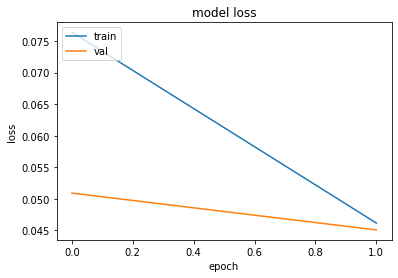

In [25]:
import glob
import os
from matplotlib import pyplot as plt
torch.cuda.empty_cache()
!rm -rf ./models
!mkdir ./models
do_plot = True


#try:
train_losses, val_losses =  train()
if do_plot:
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

##Epochs 3 and 4

In [28]:
torch.cuda.empty_cache()

In [ ]:
torch.save(model.state_dict(), f'./models/network_epoch_{2}.model') 

In [ ]:
# To use Transformer for Vision 
model = Network(hyperparms={"device": device, "model_name": "google/vit-base-patch16-224-in21k", "vision_dim": 768, "text_dim": 768, "proj_dim": 512})
model.to(device)
print()

In [104]:
!cp /content/models/network_epoch_2.model /content/drive/MyDrive/TechSquad

train_steps 1843
warm_steps 184


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.03971667950993117
Validation loss: 0.037899874664586164

Saving best model


Epoch 2:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.031598217330808365
Validation loss: 0.03444831834399495

Saving best model


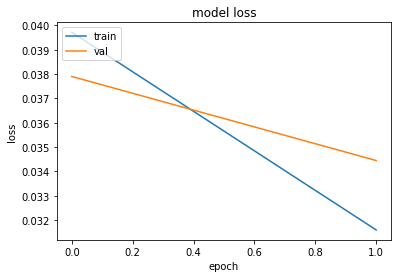

In [105]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.load_state_dict(torch.load(f'./models/network_epoch_{2}.model'))
model.to(device)


optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  weight_decay = 1e-5,
                  eps=1e-8
                  )
                  
                  
epochs = 2
train_steps= int((train_dataframe.shape[0] / batch_size) * epochs)
print("train_steps", train_steps)
warm_steps = int(train_steps * 0.1)
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)

torch.cuda.empty_cache()
!rm -rf ./models
!mkdir ./models
do_plot = True


#try:
train_losses, val_losses =  train()
if do_plot:
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



##Epochs 5 and 6

In [106]:
!cp /content/models/network_epoch_4.model /content/drive/MyDrive/TechSquad

train_steps 1843
warm_steps 184


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.028308748456481805
Validation loss: 0.030985873224663323

Saving best model


Epoch 2:   0%|          | 0/922 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.022323456645383623
Validation loss: 0.029353605470909126

Saving best model


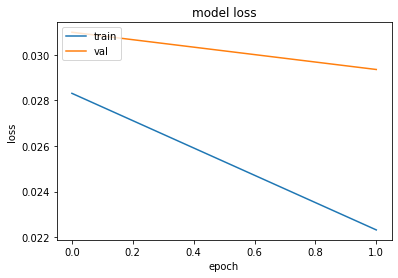

In [19]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW
import glob
import os
from matplotlib import pyplot as plt
# To use Transformer for Vision 
model = Network(hyperparms={"device": device, "model_name": "google/vit-base-patch16-224-in21k", "vision_dim": 768, "text_dim": 768, "proj_dim": 512})
device = "cuda" if torch.cuda.is_available() else "cpu"
model.load_state_dict(torch.load(f'/content/drive/MyDrive/TechSquad/network_epoch_4.model'))
model.to(device)


optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  weight_decay = 1e-5,
                  eps=1e-8
                  )
                  
                  
epochs = 2
train_steps= int((train_dataframe.shape[0] / batch_size) * epochs)
print("train_steps", train_steps)
warm_steps = int(train_steps * 0.1)
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)

torch.cuda.empty_cache()
!rm -rf ./models
!mkdir ./models
do_plot = True


#try:
train_losses, val_losses =  train()
if do_plot:
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


In [36]:
!cp /content/models/network_epoch_6.model /content/drive/MyDrive/TechSquad

#Quantitiative Evaluation

In [ ]:
from torch.utils.data import DataLoader, SequentialSampler

test_dataset = FashionDataset(root_dir='./images',df=test_dataframe)


test_batch_size = 512
dataloader_test = DataLoader(search_dataset, 
                                   sampler=SequentialSampler(test_dataset), 
                                   batch_size=test_batch_size)

def get_image_embeddings():
    model.eval()
    test_image_embeddings = []
    image_names = []
    with torch.no_grad():
        for batch in tqdm(dataloader_test):
            image_features = model.image_encoder(batch["anchor"])             
            image_names.extend(batch["image_name"])
            image_embeddings = model.vision_projection(image_features)
            test_image_embeddings.append(image_embeddings)
    return image_names, torch.cat(test_image_embeddings)

image_names, image_embeddings = get_image_embeddings()

In [35]:
from sentence_transformers import util

def search(query, image_embeddings, img_names, k=101):
    query_emb = model.text_encoder(query)
    query_emb = model.text_projection(query_emb)
    hits = util.semantic_search(query_emb, image_embeddings, top_k=k)[0]
    return [img_names[hit['corpus_id']] for hit in hits]
        
def get_results(df):
    from collections import defaultdict
    attr2Image = defaultdict(list)
    attr2Pred_Image = defaultdict(list)
    actuals = []
    predictions = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        attr = row["positive"]    
        if attr not in attr2Image:
            attr2Image["attr"] = df[df.positive == attr]["image_id"].to_list()
        actuals.append(attr2Image["attr"])
        if attr not in attr2Pred_Image:
           attr2Pred_Image["attr"] = search(attr, image_embeddings, image_names)
           
        predictions.append(attr2Pred_Image["attr"])

    return actuals, predictions

actuals, predictions = get_results(test_dataframe)

  0%|          | 0/3030 [00:00<?, ?it/s]

In [102]:
#2 epochs
def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = round(len(act_set & pred_set) / float(len(act_set)), 2)
    return result

def recall_at_k(k=1):
    results = []
    for actual, predicted in zip(actuals, predictions):
         results.append(recall(actual, predicted, k))
    return results         

R1 = recall_at_k(1)
R5 = recall_at_k(5)
R20 = recall_at_k(20)
R100 = recall_at_k(100)
Mean_R1 = sum(R1) / len(R1)
Mean_R5 = sum(R5) / len(R5)
Mean_R20 = sum(R20) / len(R20)
Mean_R100 = sum(R100)/ len(R100)
print(Mean_R1)
print(Mean_R5)
print(Mean_R20)
print(Mean_R100)

0.006950495049504948
0.03334323432343236
0.10121782178217828
0.3089273927392744


In [121]:
#4 epochs
def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = round(len(act_set & pred_set) / float(len(act_set)), 2)
    return result

def recall_at_k(k=1):
    results = []
    for actual, predicted in zip(actuals, predictions):
         results.append(recall(actual, predicted, k))
    return results         

R1 = recall_at_k(1)
R5 = recall_at_k(5)
R20 = recall_at_k(20)
R100 = recall_at_k(100)
Mean_R1 = sum(R1) / len(R1)
Mean_R5 = sum(R5) / len(R5)
Mean_R20 = sum(R20) / len(R20)
Mean_R100 = sum(R100)/ len(R100)
print(Mean_R1)
print(Mean_R5)
print(Mean_R20)
print(Mean_R100)

0.014158415841584155
0.051178217821782196
0.1593564356435642
0.39180528052805275


In [37]:
#6 epochs
def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = round(len(act_set & pred_set) / float(len(act_set)), 2)
    return result

def recall_at_k(k=1):
    results = []
    for actual, predicted in zip(actuals, predictions):
         results.append(recall(actual, predicted, k))
    return results         

R1 = recall_at_k(1)
R5 = recall_at_k(5)
R20 = recall_at_k(20)
R100 = recall_at_k(100)
Mean_R1 = sum(R1) / len(R1)
Mean_R5 = sum(R5) / len(R5)
Mean_R20 = sum(R20) / len(R20)
Mean_R100 = sum(R100)/ len(R100)
print(Mean_R1)
print(Mean_R5)
print(Mean_R20)
print(Mean_R100)

0.017808580858085815
0.06331023102310228
0.17059075907590732
0.41350495049504976
